In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key
from config import weather_api_key

In [2]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need 
# to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, 
# we'll declare each array as a variable.

In [3]:
# Create a set of random latitude and longitude combinations.
# To ensure enough latitudes and longitudes, we'll start with 1,500.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the 
# same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 
# 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by 
# the index of 0 and 1, respectively.

In [5]:
# Next, let's unpack our lat_lngs zip object into a list. 
# This way, we only need to create a set of random latitudes and longitudes once.

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [8]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate 
# through the list of tuples and find the nearest city to those coordinates.

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Next, use the five pairs of latitudes and longitudes we used from our zip practice to get a city and country code 
# from the citipy module. In a new cell, create a for loop that will do the following:
# Iterate through the coordinates' zipped tuple.
# Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: 
# coordinate[0], coordinate[1].
# To print the city name, chain the city_name to the nearest_city() function.
# To print the country name, chain the country_code to the nearest_city() function.

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [12]:
# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude 
# and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city is already in the cities 
# list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 
# latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want 
# to be sure we capture only the unique cities.

In [13]:
# Finding: When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, 
# increase your size limit on the np.random.uniform() function.

In [14]:
# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
# We will need to do the following:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=336e9f6e911a9e2f02ea5454a07ad2de


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []

In [18]:
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# In the code block, we have initialized the counters at 1 because we want the first iteration 
# of the logging for each recorded response and the set to start at 1.

In [20]:
# Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records 
# in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing

In [21]:
# Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + '&q=' + cities[i]
    
# Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, 
# this will cause programming errors when we are building the city_url because it adds the index, not the city name, 
# to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list. Instead of 
# using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of 
# cities and retrieve both the index, and the city from the list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index 
#     is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the 
#     blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the 
#     corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mys shmidta
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | kambove
Processing Record 7 of Set 1 | sakakah
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | daosa
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | shalya
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | emerald
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | kirovskiy
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | yanam
Processing Record 22 of Set 1 | clyde river
Processing Record 23 of Set 1 | butaritari
Processing Record 24 of Set 1 | albany
Processing Record 25 o

Processing Record 30 of Set 6 | folldal
Processing Record 31 of Set 6 | taonan
Processing Record 32 of Set 6 | torbay
Processing Record 33 of Set 6 | oistins
Processing Record 34 of Set 6 | tsihombe
Processing Record 35 of Set 6 | abalak
Processing Record 36 of Set 6 | barawe
Processing Record 37 of Set 6 | taoudenni
Processing Record 38 of Set 6 | hamilton
Processing Record 39 of Set 6 | watsa
Processing Record 40 of Set 6 | kutum
Processing Record 41 of Set 6 | sitka
Processing Record 42 of Set 6 | nisia floresta
Processing Record 43 of Set 6 | maldonado
Processing Record 44 of Set 6 | teguldet
Processing Record 45 of Set 6 | novaya lyalya
Processing Record 46 of Set 6 | khandyga
Processing Record 47 of Set 6 | bolungarvik
Processing Record 48 of Set 6 | turukhansk
Processing Record 49 of Set 6 | salina cruz
Processing Record 50 of Set 6 | poum
Processing Record 1 of Set 7 | slave lake
Processing Record 2 of Set 7 | mahadday weyne
Processing Record 3 of Set 7 | moose factory
Processi

In [22]:
# We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request 
# isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the 
# dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.

In [23]:
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | kambove
Processing Record 7 of Set 1 | sakakah
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | daosa
City not found. Skipping...
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | shalya
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | emerald
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | kirovskiy
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | yanam
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | tunduru
City not found. Skipping...
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | hofn
Processing Record 45 of Set 4 | svetlaya
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | tarnogskiy gorodok
Processing Record 48 of Set 4 | zhuhai
Processing Record 49 of Set 4 | payakumbuh
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | misratah
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | namtsy
Processing Record 5 of Set 5 | lolua
City not found. Skipping...
Processing Record 6 of Set 5 | tiebissou
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | manzhouli
Processing Record 9 of Set 5 | ponta delgada
Processing Record 10 of Set 5 | 

Processing Record 24 of Set 8 | illoqqortoormiut
City not found. Skipping...
Processing Record 25 of Set 8 | keningau
Processing Record 26 of Set 8 | barmer
Processing Record 27 of Set 8 | florence
Processing Record 28 of Set 8 | pilar
Processing Record 29 of Set 8 | hihifo
City not found. Skipping...
Processing Record 30 of Set 8 | usinsk
Processing Record 31 of Set 8 | moanda
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | mpongwe
Processing Record 34 of Set 8 | los corrales de buelna
Processing Record 35 of Set 8 | imbituba
Processing Record 36 of Set 8 | monkey bay
Processing Record 37 of Set 8 | ocean city
Processing Record 38 of Set 8 | erdenet
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | sitio novo do tocantins
Processing Record 41 of Set 8 | gamarra
Processing Record 42 of Set 8 | saint-louis
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | chkalovsk
Processing Record 45 of Set 8 | chagda
City not found. Skipp

Processing Record 11 of Set 12 | paso de carrasco
Processing Record 12 of Set 12 | gorom-gorom
Processing Record 13 of Set 12 | itarema
Processing Record 14 of Set 12 | takoradi
Processing Record 15 of Set 12 | seoul
Processing Record 16 of Set 12 | los algarrobos
Processing Record 17 of Set 12 | kalmunai
Processing Record 18 of Set 12 | olinda
Processing Record 19 of Set 12 | broken hill
Processing Record 20 of Set 12 | do rud
City not found. Skipping...
Processing Record 21 of Set 12 | aberdeen
Processing Record 22 of Set 12 | araguacu
Processing Record 23 of Set 12 | innisfail
Processing Record 24 of Set 12 | ndele
Processing Record 25 of Set 12 | yeppoon
Processing Record 26 of Set 12 | bathsheba
Processing Record 27 of Set 12 | shetpe
Processing Record 28 of Set 12 | kodinsk
Processing Record 29 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 30 of Set 12 | tingi
Processing Record 31 of Set 12 | bembereke
Processing Record 32 of Set 12 | kajaani
Processing Reco

In [24]:
# Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in 
# the correct order, and exporting the DataFrame to a comma-separated (CSV) file.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,-7.08,89,86,5.21,RU,2021-03-22 17:58:37
1,Port Alfred,-33.5906,26.8910,64.90,74,2,7.67,ZA,2021-03-22 17:58:37
2,Rikitea,-23.1203,-134.9692,79.77,75,42,13.40,PF,2021-03-22 17:58:37
3,Jamestown,42.0970,-79.2353,59.00,20,1,9.17,US,2021-03-22 17:54:13
4,Kambove,-10.8764,26.5969,62.78,93,96,1.70,CD,2021-03-22 17:58:38
5,Sakakah,29.9697,40.2064,82.40,20,20,9.22,SA,2021-03-22 17:58:38
6,Yellowknife,62.4560,-114.3525,-11.00,58,1,6.91,CA,2021-03-22 17:56:58
7,Hithadhoo,-0.6000,73.0833,83.82,73,57,10.11,MV,2021-03-22 17:54:22
8,Shalya,57.2471,58.7298,18.57,93,52,8.77,RU,2021-03-22 17:58:38
9,Vaini,-21.2000,-175.2000,75.20,88,20,6.91,TO,2021-03-22 17:54:13


In [25]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
# so they are easy to read.
# REWIND
# Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

In [26]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2021-03-22 17:58:37,65.5833,-171.0000,-7.08,89,86,5.21
1,Port Alfred,ZA,2021-03-22 17:58:37,-33.5906,26.8910,64.90,74,2,7.67
2,Rikitea,PF,2021-03-22 17:58:37,-23.1203,-134.9692,79.77,75,42,13.40
3,Jamestown,US,2021-03-22 17:54:13,42.0970,-79.2353,59.00,20,1,9.17
4,Kambove,CD,2021-03-22 17:58:38,-10.8764,26.5969,62.78,93,96,1.70
...,...,...,...,...,...,...,...,...,...
544,Douala,CM,2021-03-22 18:01:10,4.0483,9.7043,80.60,89,40,2.30
545,Yumen,CN,2021-03-22 18:01:11,40.2833,97.2000,42.21,17,69,16.60
546,Conde,BR,2021-03-22 18:01:11,-7.2597,-34.9075,86.00,66,20,12.66
547,Shenkursk,RU,2021-03-22 18:01:11,62.1091,42.8960,25.99,93,100,8.88


In [27]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities.
# We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.
# First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, 
# humidity, cloudiness, and wind speed from all the cities. 

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

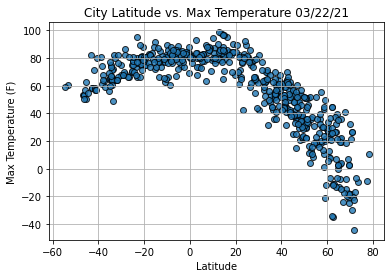

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

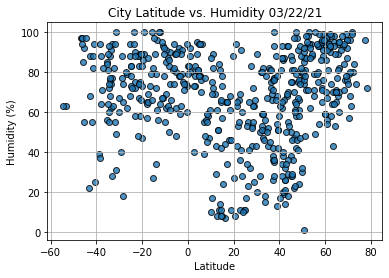

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

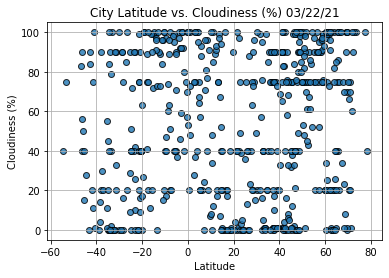

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

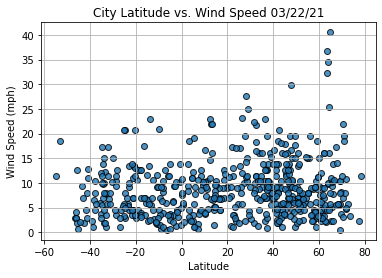

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()